### Tutorial on using Napari to explore AnnData object

TO DO !!!

In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import squidpy as sq
from napari.utils.notebook_display import nbscreenshot

In [4]:
PATH = "/Users/giovanni.palla/Datasets/20200909_PublicVisium_giovanni.palla_LIGHWEIGHT/20191205_10XVisium_MouseBrainCoronal_giovanni.palla"
dataset_name = "V1_Adult_Mouse_Brain"

In [5]:
adata = sc.read_visium(PATH, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
img = sq.im.ImageContainer(
    img=PATH + "/" + f"{dataset_name}_image.tif", img_id=dataset_name, lazy=True
)
img.shape

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(11291, 11757)

In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.5)
adata = adata[:, adata.var.highly_variable == True].copy()

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


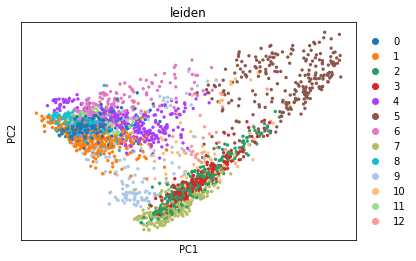

In [7]:
sc.pl.pca(adata, color="leiden")

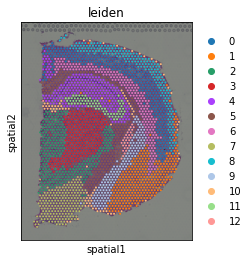

In [8]:
sc.pl.spatial(adata, color="leiden", size=1)

In [9]:
%gui qt

In [10]:
ad2nap = sq.pl.interactive(adata, img)

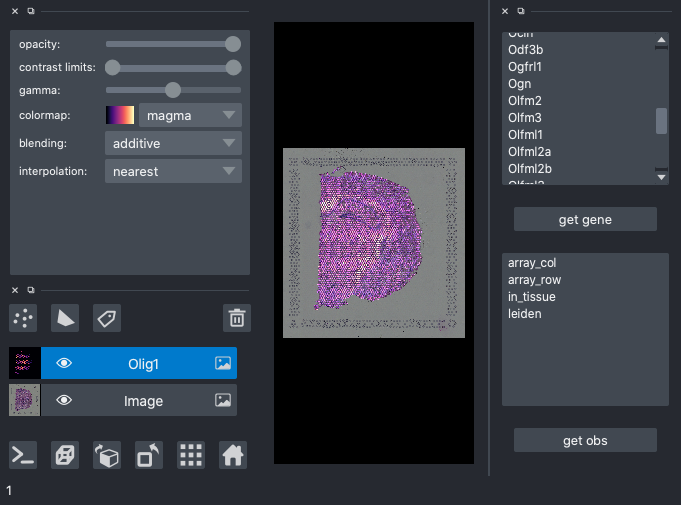

In [12]:
nbscreenshot(ad2nap.viewer)